## Sample Passages

In [14]:
import json

In [15]:
hotflip = json.loads('["\u2581That", "\u2581drawings", "\u2581promises", "\u2581Key", "kot", "iner", "jor", "\u2581Respond", "\u2581machines", "AK", "<pad>", "ance", "p\u00e9", "izi", "very", "\u2581nie", "<pad>", "<pad>", "Doar", "ceapa", "\u2581Weg", "MEN", "\u2581Am", "\u2581OK", "\u2581Jamie", "\u2581words", "\u2581Um", "\u2581Imp", "refers", "\u201c", "\u2581War", "\u2581Hop", "nism", "\u2581the", "\u2581serving", "\u2581Bol", "\u2581auto", "Palatul", "\u2581fries", "rome", "\u2581lighter", "\u2581(1", "\u258149", "\u2581fetch", "\u258119", "\u2581cities", "\u2581can", "\u2581counting", "\u258116,", "\u2581As"]')
vec2text = json.loads('["\u2581when", "\u2581does", "\u2581the", "\u25817", "\u2581episode", "\u2581season", "\u2581of", "\u2581the", "\u2581new", "\u2581two", "\u2581come", "\u2581out", "</s>"]')

In [16]:
def convert_to_sentence(vec):
    return ' '.join([w.replace('▁','') for w in vec])

In [17]:
convert_to_sentence(hotflip)

'That drawings promises Key kot iner jor Respond machines AK <pad> ance pé izi very nie <pad> <pad> Doar ceapa Weg MEN Am OK Jamie words Um Imp refers “ War Hop nism the serving Bol auto Palatul fries rome lighter (1 49 fetch 19 cities can counting 16, As'

In [18]:
convert_to_sentence(vec2text)

'when does the 7 episode season of the new two come out </s>'

## Noise Injection

In [19]:
from plotnine import *
import pandas as pd

In [20]:
df = pd.read_csv("noise_injection_results.tsv", sep='\t')
new_df = df.loc[:, ['Model', 'Noise', 'Effectiveness (top 20)', 'Reconstructibility (bleu)']]
new_df['Effectiveness (top 20)'] = new_df['Effectiveness (top 20)']*100

In [21]:
new_df

Model  Noise  Effectiveness (top 20)  Reconstructibility (bleu)
0   GTR original  0.001                   71.08                    73.0471
1   GTR original  0.010                   70.11                    12.4155
2   GTR original  0.100                    8.84                     1.5463
3   GTR original  1.000                    6.81                     1.1747
4      GTR fixed  0.001                   77.26                    53.5970
5      GTR fixed  0.010                   76.90                     8.4979
6      GTR fixed  0.100                    8.20                     1.4835
7      GTR fixed  1.000                    6.65                     1.3448
8            DPR  0.001                   80.06                    71.6280
9            DPR  0.010                   79.92                    68.9989
10           DPR  0.100                   78.61                    10.1402
11           DPR  1.000                    7.87                     1.8390

In [22]:
long_df = pd.melt(new_df, id_vars=['Model', 'Noise'], var_name='Measure', value_name='Value')
long_df

Model  Noise                    Measure    Value
0   GTR original  0.001     Effectiveness (top 20)  71.0800
1   GTR original  0.010     Effectiveness (top 20)  70.1100
2   GTR original  0.100     Effectiveness (top 20)   8.8400
3   GTR original  1.000     Effectiveness (top 20)   6.8100
4      GTR fixed  0.001     Effectiveness (top 20)  77.2600
5      GTR fixed  0.010     Effectiveness (top 20)  76.9000
6      GTR fixed  0.100     Effectiveness (top 20)   8.2000
7      GTR fixed  1.000     Effectiveness (top 20)   6.6500
8            DPR  0.001     Effectiveness (top 20)  80.0600
9            DPR  0.010     Effectiveness (top 20)  79.9200
10           DPR  0.100     Effectiveness (top 20)  78.6100
11           DPR  1.000     Effectiveness (top 20)   7.8700
12  GTR original  0.001  Reconstructibility (bleu)  73.0471
13  GTR original  0.010  Reconstructibility (bleu)  12.4155
14  GTR original  0.100  Reconstructibility (bleu)   1.5463
15  GTR original  1.000  Reconstructibility (bleu)   1.1747
16     GTR fixed  0.001  Reconstructibility (bleu)  53.5970
17     GTR fixed  0.010  Reconstructibility (bleu)   8.4979
18     GTR fixed  0.100  Reconstructibility (bleu)   1.4835
19     GTR fixed  1.000  Reconstructibility (bleu)   1.3448
20           DPR  0.001  Reconstructibility (bleu)  71.6280
21           DPR  0.010  Reconstructibility (bleu)  68.9989
22           DPR  0.100  Reconstructibility (bleu)  10.1402
23           DPR  1.000  Reconstructibility (bleu)   1.8390

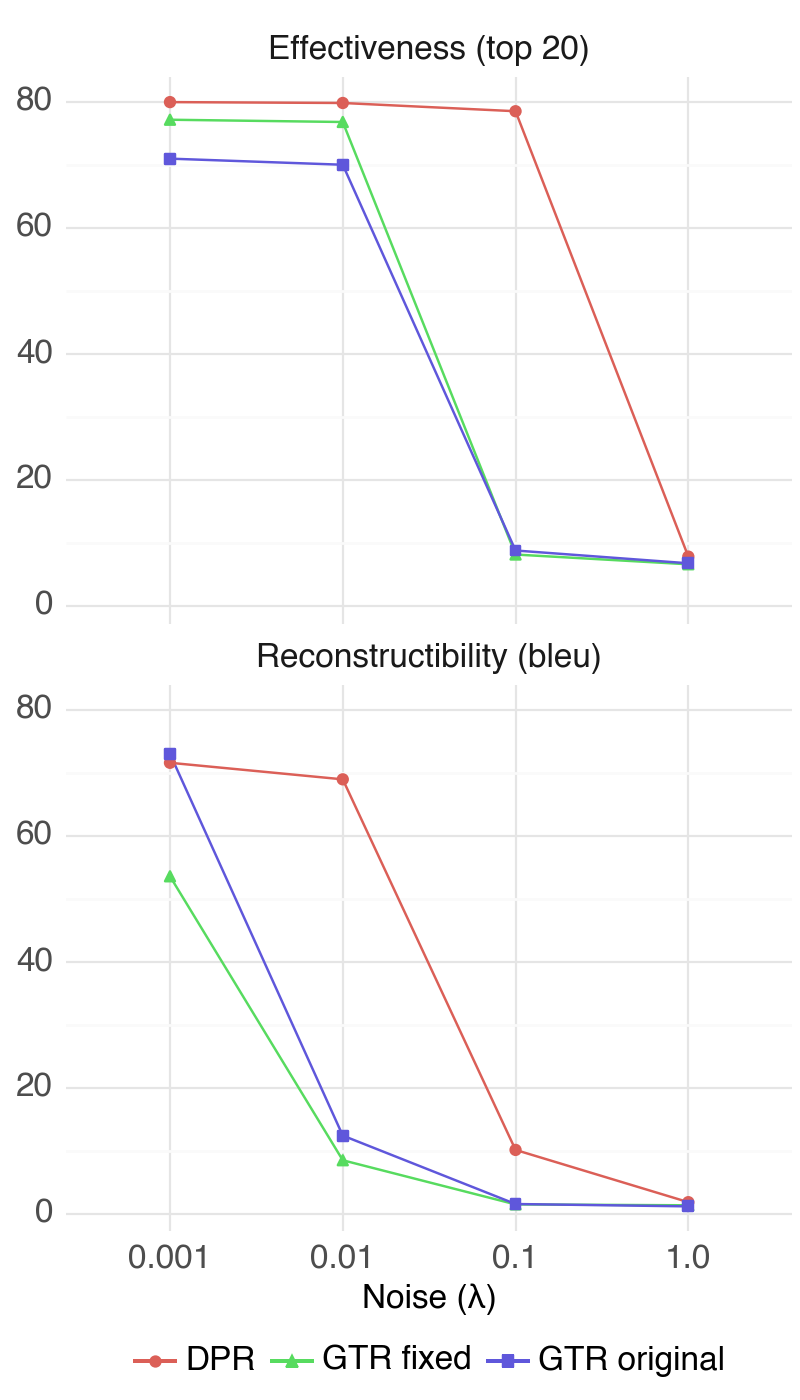

In [42]:
line_plot = (
    ggplot(long_df, aes(x='factor(Noise)', y='Value', color="Model", group="Model", shape="Model")) +  # Specify data and aesthetics
    geom_line() +
    geom_point() +
    facet_wrap("Measure", ncol=1) +
    labs(x='Noise (λ)', y='') +  # Add labels and title
    theme_minimal() +
    theme(text=element_text(size=12, family="Helvetica")) +
    theme(figure_size=(4,7)) +
    theme(legend_position='bottom', legend_title=element_blank())
)

# Display the plot
print(line_plot)


In [43]:
line_plot.save("../figures/noise_plot.pdf")

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4 x 7 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../figures/noise_plot.pdf
